In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from bs4 import BeautifulSoup
import requests     # 2.18.4
import json         # 2.0.9
pd.set_option('display.max_columns', None)

## Extraccion y generacion de datos y visualizaciones muy sencillas con BeatifulSoup, Pandas y Matplotlib

variables para scraping

In [6]:
url = "http://gonzaleschaves.gob.ar/sueldos-del-personal-municipal/sueldos-liquidos-julio-2022/"

Utilizamos BeautifulSoup: analisis de web y preparacion de algoritmo de scraping

In [7]:



data_scraping = []

response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
div = soup.find("div", {"class": "page-content-new"})
figure_all = div.find_all("figure", class_="wp-block-table is-style-stripes")
for figure in figure_all:
    table = figure.find("table")
    body = table.find("tbody")
    tr = body.find_all("tr")
    for row in tr:
        
        td = row.find_all("td")
        row = [i.text for i in row]
        data_scraping.append(row)



Generamos el DataFrame con los datos de los sueldos

In [8]:
sueldos = pd.DataFrame(data_scraping, columns=['Legajo', 'Nombre y Apellido', 'Sueldo'])
sueldos.head()

,Legajo,Nombre y Apellido,Sueldo
0,Legajo,Apellido y Nombres,Líquido
1,77,"ETCHEVERS, Néstor Alfredo","250.444,96"
2,84,"CHALDE, María Genoveva","150.374,87"
3,93,"GANDARA, Carlos Oscar","88.384,47"
4,141,"PARADISI, José Osvaldo","65.470,81"


Exportamos el DataFrame a un archivo csv

In [9]:
df_export = sueldos.to_csv('sueldos_crudo.csv', index=False)

Cargamos Csv exportado en un DataFrame (ya no  es necesario ejecutar el scraping)

In [10]:
sueldos = pd.read_csv('sueldos_crudo.csv')
sueldos.head()


,Legajo,Nombre y Apellido,Sueldo
0,Legajo,Apellido y Nombres,Líquido
1,77,"ETCHEVERS, Néstor Alfredo","250.444,96"
2,84,"CHALDE, María Genoveva","150.374,87"
3,93,"GANDARA, Carlos Oscar","88.384,47"
4,141,"PARADISI, José Osvaldo","65.470,81"


tipos de datos

In [11]:
sueldos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Legajo             554 non-null    object
 1   Nombre y Apellido  554 non-null    object
 2   Sueldo             554 non-null    object
dtypes: object(3)
memory usage: 13.1+ KB


### Normalizamos los datos



Pasamos datos vacios a NaN

In [12]:
nan_value = float("NaN")
sueldos_normalizado = sueldos.replace("", nan_value, inplace=True)


Quitamos Rows sucias: con datos vacios o con datos que no son sueldos

In [13]:

normalizacion = sueldos.loc[sueldos['Legajo'] != 'Legajo'].dropna()
normalizacion.astype({'Legajo': 'int64', 'Nombre y Apellido': 'str'})
normalizacion['Sueldo'] = normalizacion['Sueldo'].str.replace('.', '')
normalizacion['Sueldo'] = normalizacion['Sueldo'].str.replace(',', '.')
normalizacion = normalizacion.astype({'Legajo': int, 'Nombre y Apellido': str, 'Sueldo': float})
normalizacion.head()

C:\Users\ismael\AppData\Local\Temp\ipykernel_20788\2921275970.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  normalizacion['Sueldo'] = normalizacion['Sueldo'].str.replace('.', '')


,Legajo,Nombre y Apellido,Sueldo
1,77,"ETCHEVERS, Néstor Alfredo",250444.96
2,84,"CHALDE, María Genoveva",150374.87
3,93,"GANDARA, Carlos Oscar",88384.47
4,141,"PARADISI, José Osvaldo",65470.81
5,204,"CHAZARRETA, Néstor Sergio",86798.12


Exportamos el DataFrame normalizado a un archivo csv

In [14]:
df_normalizado_export = normalizacion.to_csv('sueldos_normalizados.csv', index=False)

### Generamos las variables para el analisis

Traemos el DataFrame normalizado

In [15]:
sueldos = pd.read_csv('sueldos_normalizados.csv')
sueldos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Legajo             553 non-null    int64  
 1   Nombre y Apellido  553 non-null    object 
 2   Sueldo             553 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 13.1+ KB


#### Variables para el analisis

In [16]:
sueldos = sueldos['Sueldo'].sort_values(ascending=True)
sueldos.head()

410    22585.56
541    23997.16
225    31055.14
523    37436.55
341    37790.33
Name: Sueldo, dtype: float64

Creacion de intervalos de sueldos

In [17]:
sueldo_menor_50k = 0
empleados_menores_50k = 0
sueldo_50k_75k = 0
empleados_50k_75k = 0
sueldo_75k_100k = 0
empleados_75k_100k = 0
sueldo_100k_125k = 0
empleados_100k_125k = 0
sueldo_125k_150k = 0
empleados_125k_150k = 0
sueldo_150k_200k = 0
empleados_150k_200k = 0
sueldo_200k_250k = 0
empleados_200k_250k = 0
sueldo_250k_300k = 0
empleados_250k_300k = 0
sueldo_300k_350k = 0
empleados_300k_350k = 0
sueldo_350k_400k = 0
empleados_350k_400k = 0
sueldo_mayor_400k= 0
empleados_mayor_400k = 0
sueldos_intervalos = dict()
sueldos_titulos_intervalos = []
cantidad_empleados_intervalos = dict()
sueldos_valor_intervalos = []
cantidad_empleados_valor_intervalos = []
for sueldo in sueldos:
    if sueldo < 50000:
        sueldo_menor_50k = sueldo_menor_50k + sueldo
        sueldos_intervalos['menor_50k'] = sueldo_menor_50k
        empleados_menores_50k = empleados_menores_50k + 1
        cantidad_empleados_intervalos['menor_50k'] = empleados_menores_50k
    elif sueldo >= 50000 and sueldo < 75000:
        sueldo_50k_75k = sueldo_50k_75k + sueldo
        sueldos_intervalos['50k_75k'] = sueldo_50k_75k
        empleados_50k_75k = empleados_50k_75k + 1
        cantidad_empleados_intervalos['50k_75k'] = empleados_50k_75k
    elif sueldo >= 75000 and sueldo < 100000:
        sueldo_75k_100k = sueldo_75k_100k + sueldo
        sueldos_intervalos['75k_100k'] = sueldo_75k_100k
        empleados_75k_100k = empleados_75k_100k + 1
        cantidad_empleados_intervalos['75k_100k'] = empleados_75k_100k
    elif sueldo >= 100000 and sueldo < 125000:
        sueldo_100k_125k = sueldo_100k_125k + sueldo
        sueldos_intervalos['100k_125k'] = sueldo_100k_125k
        empleados_100k_125k = empleados_100k_125k + 1
        cantidad_empleados_intervalos['100k_125k'] = empleados_100k_125k
    elif sueldo >= 125000 and sueldo < 150000:
        sueldo_125k_150k = sueldo_125k_150k + sueldo
        sueldos_intervalos['125k_150k'] = sueldo_125k_150k
        empleados_125k_150k = empleados_125k_150k + 1
        cantidad_empleados_intervalos['125k_150k'] = empleados_125k_150k
    elif sueldo >= 150000 and sueldo < 200000:
        sueldo_150k_200k = sueldo_150k_200k + sueldo
        sueldos_intervalos['150k_200k'] = sueldo_150k_200k
        empleados_150k_200k = empleados_150k_200k + 1
        cantidad_empleados_intervalos['150k_200k'] = empleados_150k_200k
    elif sueldo >= 200000 and sueldo < 250000:
        sueldo_200k_250k = sueldo_200k_250k + sueldo
        sueldos_intervalos['200k_250k'] = sueldo_200k_250k
        empleados_200k_250k = empleados_200k_250k + 1
        cantidad_empleados_intervalos['200k_250k'] = empleados_200k_250k
    elif sueldo >= 250000 and sueldo < 300000:
        sueldo_250k_300k = sueldo_250k_300k + sueldo
        sueldos_intervalos['250k_300k'] = sueldo_250k_300k
        empleados_250k_300k = empleados_250k_300k + 1
        cantidad_empleados_intervalos['250k_300k'] = empleados_250k_300k
        
    elif sueldo >= 300000 and sueldo < 350000:
        sueldo_300k_350k = sueldo_300k_350k + sueldo
        sueldos_intervalos['300k_350k'] = sueldo_300k_350k
        sueldos_intervalos['350k_400k'] = 0
        empleados_300k_350k = empleados_300k_350k + 1
        cantidad_empleados_intervalos['300k_350k'] = empleados_300k_350k
        cantidad_empleados_intervalos['350k_400k'] = empleados_350k_400k
    elif sueldo >= 350000 and sueldo < 400000:
        sueldo_350k_400k = sueldo_350k_400k + sueldo
        sueldos_intervalos['350k_400k'] = sueldo_350k_400k
        empleados_350k_400k = empleados_350k_400k + 1
        cantidad_empleados_intervalos['350k_400k'] = empleados_350k_400k
    elif sueldo >= 400000:
        sueldo_mayor_400k = sueldo_mayor_400k + sueldo
        sueldos_intervalos['mayor_400k'] = sueldo_mayor_400k
        empleados_mayor_400k = empleados_mayor_400k + 1
        cantidad_empleados_intervalos['mayor_400k'] = empleados_mayor_400k




for valor in cantidad_empleados_intervalos.values():
    cantidad_empleados_valor_intervalos.append(f'{valor} empleados')
for titulo in sueldos_intervalos.keys():
    sueldos_titulos_intervalos.append(titulo)



print(f'\n Los intervalos de sueldos son: {sueldos_intervalos.keys()} \n')
print(sueldos_intervalos)

print(f'\nHay {len(cantidad_empleados_intervalos.keys())} intervalos de sueldos \n')
print(cantidad_empleados_intervalos)



 Los intervalos de sueldos son: dict_keys(['menor_50k', '50k_75k', '75k_100k', '100k_125k', '125k_150k', '150k_200k', '200k_250k', '250k_300k', '300k_350k', '350k_400k', 'mayor_400k']) 

{'menor_50k': 1258172.4299999997, '50k_75k': 11662408.820000006, '75k_100k': 12849876.98999999, '100k_125k': 10296923.270000001, '125k_150k': 5887785.24, '150k_200k': 6543134.670000001, '200k_250k': 1328556.37, '250k_300k': 1374244.87, '300k_350k': 305417.94, '350k_400k': 393363.37, 'mayor_400k': 2358389.4699999997}

Hay 11 intervalos de sueldos 

{'menor_50k': 29, '50k_75k': 184, '75k_100k': 147, '100k_125k': 93, '125k_150k': 43, '150k_200k': 39, '200k_250k': 6, '250k_300k': 5, '300k_350k': 1, '350k_400k': 1, 'mayor_400k': 5}


#### Cantidad empleados por intervalo de sueldos

In [18]:
cantidad_empleados_intervalos

{'menor_50k': 29,
 '50k_75k': 184,
 '75k_100k': 147,
 '100k_125k': 93,
 '125k_150k': 43,
 '150k_200k': 39,
 '200k_250k': 6,
 '250k_300k': 5,
 '300k_350k': 1,
 '350k_400k': 1,
 'mayor_400k': 5}

#### Los intervalos de sueldos son:

In [19]:
sueldos_intervalos.keys()

dict_keys(['menor_50k', '50k_75k', '75k_100k', '100k_125k', '125k_150k', '150k_200k', '200k_250k', '250k_300k', '300k_350k', '350k_400k', 'mayor_400k'])

#### Suma de sueldos por intervalo salarial

In [20]:
sueldos_intervalos

{'menor_50k': 1258172.4299999997,
 '50k_75k': 11662408.820000006,
 '75k_100k': 12849876.98999999,
 '100k_125k': 10296923.270000001,
 '125k_150k': 5887785.24,
 '150k_200k': 6543134.670000001,
 '200k_250k': 1328556.37,
 '250k_300k': 1374244.87,
 '300k_350k': 305417.94,
 '350k_400k': 393363.37,
 'mayor_400k': 2358389.4699999997}

#### Grafico de torta mostrando cuanto representa cada intervalo salarial en el total de sueldos y cantidad de empleados por intervalo salarial.

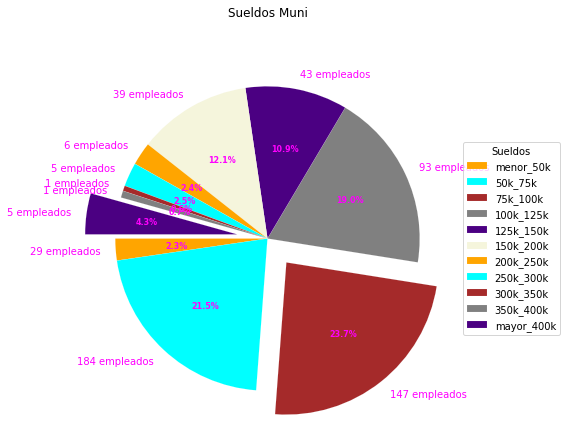

In [23]:

# Creating dataset
valores = sueldos_intervalos.keys()
empleados_labels = cantidad_empleados_valor_intervalos
datos_intervalos = sueldos_intervalos.values()

# Creating explode data
explode = (0, 0, 0.2, 0, 0,0,0,0,0,0,0.2)
 
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige")
 
# Wedge properties
wp = { 'linewidth' : 0.1, 'edgecolor' : "white" }
 
# Creating autocpt arguments
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
      
       
        val = int((pct*total/100)+0.5)
        
        return '{:.1f}%'.format(pct, val)
    return my_autopct
 
# Creating plot
fig, ax = plt.subplots(figsize =(50, 7))
wedges, texts, autotexts = ax.pie(datos_intervalos,
                                   
                                  autopct = make_autopct(datos_intervalos),
                                  explode = explode,
                                  labels = empleados_labels,
                                 
                                  colors = colors,
                                  startangle = 180,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta")
                                  )

                                 
                                  
# Adding legend
ax.legend(wedges, valores,
          title ="Sueldos",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Sueldos Muni", pad=32)
 
# show plot
plt.savefig(os.path.join('./graficos/sueldos_torta.png'), dpi=600, format='png', bbox_inches='tight')
plt.show()

#### Grafico de barras mostrando la cantidad de empleados por intervalo salarial

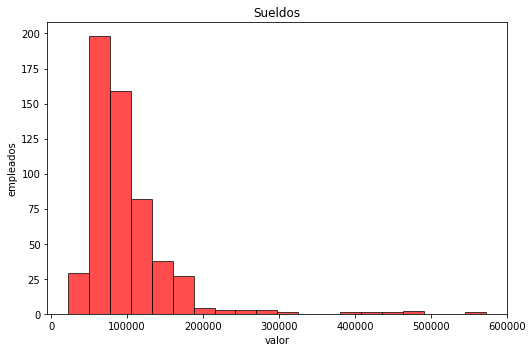

In [ ]:

plt.rcParams["figure.figsize"] = [7.50, 5]
plt.rcParams["figure.autolayout"] = True

a = sueldos
bins = 20
tick_spacing = 10

plt.hist(a, bins, facecolor='r', alpha=0.7, edgecolor='k',
	linewidth=1)
plt.title("Sueldos")
plt.xlabel("valor")
plt.ylabel("empleados")

plt.savefig(os.path.join('./graficos/sueldos.png'), dpi=300, format='png', bbox_inches='tight')

plt.show()